# Assignment 1

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

### <span style="color:chocolate">Exercise 1:</span> Create data (10 points)

Create artificial data using the function <span style="color:chocolate">create_1d_data()</span> defined at the top of this notebook. Set the following argument values:
- number of examples = 70;
- slope (w) = 2;
- intercept (b) = 1;
- bound = 1.

Denote the output by X and Y. Print the shape and the first 10 elements for each object.

In [3]:
X, Y = create_1d_data(70, 2, 1, 1)
print(f"{X=}")
print(f"{Y=}")

X=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69])
Y=array([  1.93405968,   3.0944645 ,   5.94536872,   7.42963199,
         9.39545765,  10.43217899,  13.95254891,  14.01246051,
        16.50596472,  18.86958306,  21.55876584,  22.39537015,
        25.72598647,  27.96680135,  28.32768448,  31.19466789,
        32.0179722 ,  34.77314257,  36.08832012,  39.91330594,
        40.87229329,  43.89795461,  45.57261197,  47.7325786 ,
        48.34633084,  50.14989717,  53.20148544,  54.33594437,
        57.46676034,  58.81688772,  61.05581765,  63.87514317,
        65.04339224,  66.21638677,  68.31644681,  71.0904053 ,
        73.04880816,  75.27522049,  76.80299089,  79.29961022,
        80.79380001,  83.24783223,  85.53480993,  

---
### Step 2: Data preprocessing

Given the simplicity of the data (just one feature in X), our sole task here is to divide the data into training and test sets.

### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.3 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)
print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{Y_train.shape=}")
print(f"{Y_test.shape=}")

X_train.shape=(49,)
X_test.shape=(21,)
Y_train.shape=(49,)
Y_test.shape=(21,)


---
### Step 3: Exploratory data analysis (EDA)

EDA helps us to gain insights into the distribution and characteristics of the dataset we are dealing with. 
This understanding is fundamental for making informed decisions regarding:
- data cleaning;
- feature selection;
- model building;
- model evaluation, etc.

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

1. Generate a scatter plot displaying the X_train data along the x-axis and the Y_train data along the y-axis, ensuring clear labeling of both axes. Add a title "Exploratory Data Analysis: Training Data" and a legend "observed training data" to the plot;
2. Enhance the plot by incorporating a vertical red line to denote the mean value of X_train. Accompany it with a legend clarifying the meaning of the line and the mean value of X_train.

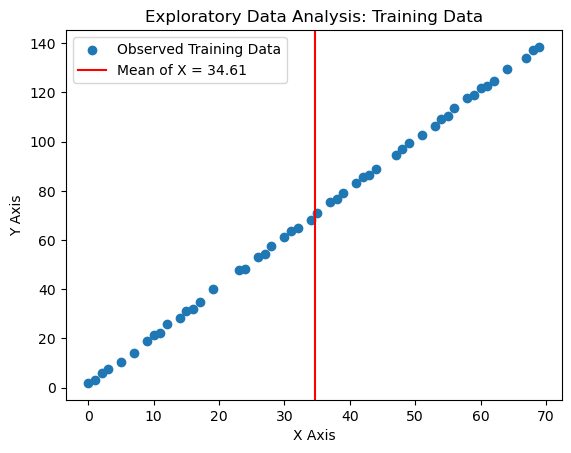

In [5]:
plt.scatter(X_train, Y_train, label="Observed Training Data")
X_train_mean=X_train.mean()
plt.axvline(X_train_mean, color="red", label=f"Mean of X = {X_train_mean:.2f}")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Exploratory Data Analysis: Training Data")
plt.legend(loc="best")
plt.show()

---
### Step 4: Modeling

In this section, our objective is to propose models to describe the data generation process. Remember a model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Models for data (10 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_train. These predictions should be vectors of the same shape as Y_train. Call these predictions M1_hat_train and M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
2. Plot the prediction lines of these two models overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend. 

M1_hat_train=array([72, 32, 63, 15, 12, 36, 19, 22, 61, 37, 40, 47,  6, 69, 24,  7, 64,
       56, 67,  5, 16, 44,  8, 73, 39, 42, 17, 60, 74, 14, 21, 10, 33, 53,
       59, 66, 49, 65, 48, 35, 31, 46, 28, 54, 20, 29, 58, 43, 52])
M2_hat_train=array([135,  55, 117,  21,  15,  63,  29,  35, 113,  65,  71,  85,   3,
       129,  39,   5, 119, 103, 125,   1,  23,  79,   7, 137,  69,  75,
        25, 111, 139,  19,  33,  11,  57,  97, 109, 123,  89, 121,  87,
        61,  53,  83,  47,  99,  31,  49, 107,  77,  95])


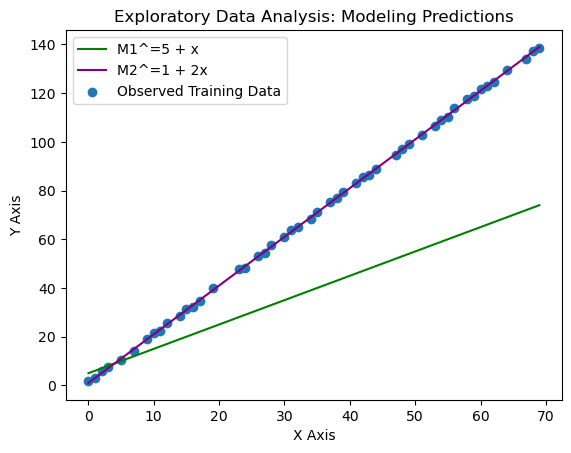

In [6]:
def model_1(data):
    return 5 + data
def model_2(data):
    return 1 + 2*data 
M1_hat_train = model_1(X_train)
M2_hat_train = model_2(X_train)
print(f"{M1_hat_train=}")
print(f"{M2_hat_train=}")

M1_hat_line = np.linspace(min(M1_hat_train),max(M1_hat_train),70)
M2_hat_line = np.linspace(min(M2_hat_train),max(M2_hat_train),70)
plt.plot(M1_hat_line, label="M1^=5 + x", color="green")
plt.plot(M2_hat_line, label="M2^=1 + 2x", color="purple")
plt.scatter(X_train, Y_train, label="Observed Training Data")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Exploratory Data Analysis: Modeling Predictions")
plt.legend(loc="best")
plt.show()

---
### Step 5: Evaluation and Generalization

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{n} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

How well do our models generalize? The test dataset serves as a proxy for unseen data in real-world applications. By evaluating the model on the test data, you can assess its ability to generalize beyond the training data. This ensures that the model can make accurate predictions on new data it hasn't seen during training.

### <span style="color:chocolate">Exercise 5:</span> Computing MSE (20 points)

1. Write a function for computing the MSE metric based on the provided definition;
2. Utilizing this function, calculate the training data MSE for the two models, $M_1$ and $M_2$.
3. Comment on which model fits the training data better.

In [7]:
# YOUR CODE HERE
def MSE(true_values, predicted_values):
    """Return the MSE between true_values and predicted values."""
    errors = true_values - predicted_values
    squared_errors = errors ** 2
    mean_squared_error = squared_errors.mean()
    return mean_squared_error

In [8]:
print(f"{MSE(Y_train, M1_hat_train)=}")
print(f"{MSE(Y_train, M2_hat_train)=}")
print("Model 2 fits the data better becuase it has a lower mean squared error.")

MSE(Y_train, M1_hat_train)=np.float64(1358.2515152570322)
MSE(Y_train, M2_hat_train)=np.float64(0.31356845204652894)
Model 2 fits the data better becuase it has a lower mean squared error.


### <span style="color:chocolate">Exercise 6:</span> Generalization (15 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_test. These predictions should be vectors of the same shape as Y_test. Call these predictions M1_hat_test and M2_hat_test.
2. Calculate the test data MSE for the two models, $M_1$ and $M_2$, using the <span style="color:chocolate">MSE()</span> function defined above.
3. Does the model you chose in Exercise 5 generalize well? Hint: compare training and test MSE.

In [9]:
# Generate the test data from the model functions defined above
print("1.")
M1_hat_test = model_1(X_test)
M2_hat_test = model_2(X_test)
# Confirm the shape matches the expectation
print("Comparing shape of M1_hat_test and M2_hat_test with Y_test...")
assert M1_hat_test.shape == Y_test.shape, "Shape does not match shape of Y_test"
print(f"{M1_hat_test.shape=} matches.")
assert M2_hat_test.shape == Y_test.shape, "Shape does not match shape of Y_test"
print(f"{M2_hat_test.shape=} matches.")

print("\n2.")
print(f"{MSE(Y_test, M1_hat_test)=}")
print(f"{MSE(Y_test, M2_hat_test)=}")

print("\n3.")
print("Model 2 still has a lower mean squared error in the test data.")
print("The model generalizes well becuase the MSE is close to 0.")

1.
Comparing shape of M1_hat_test and M2_hat_test with Y_test...
M1_hat_test.shape=(21,) matches.
M2_hat_test.shape=(21,) matches.

2.
MSE(Y_test, M1_hat_test)=np.float64(1300.1040149275498)
MSE(Y_test, M2_hat_test)=np.float64(0.3370228107719305)

3.
Model 2 still has a lower mean squared error in the test data.
The model generalizes well becuase the MSE is close to 0.


### <span style="color:chocolate">Exercise 7:</span> More features (25 points)

1. Fit an 8-th degree polynomial to (X_train, Y_train). Call the predictions of this model M3_hat_train. Hint: see <span style="color:chocolate">np.polyfit()</span> for details.
2. Plot the prediction lines of the $M_3$ overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend. 
3. Calculate the training data MSE for the $M_3$ model using the <span style="color:chocolate">MSE()</span> function defined above.
4. Does model $M_3$ do better than your chosen model in Exercise 5 at predicting the labels for new unseen data? Hint: your new unseen data is the test dataset; compare training and test MSE.

1.
model_3=Polynomial([ 70.10288337,  68.50934553,  -2.09282054,   1.53957938,
         8.4160502 ,   1.58775311, -12.62451738,  -3.35728088,
         6.4594384 ], domain=[ 0., 69.], window=[-1.,  1.], symbol='x')

2.


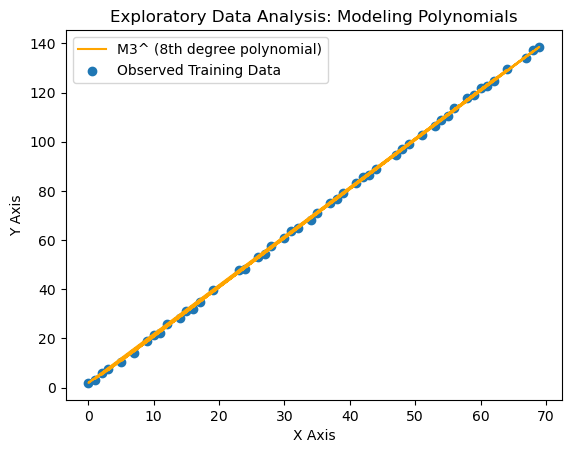


3.
MSE(Y_train, M3_hat_train)=np.float64(0.26588964117459085)

4.
MSE(Y_test, M3_hat_test)=np.float64(0.3968261065062156)
The MSE of the test data set is higher than the training data set. 
Model 3 is overfit to the training data and does not generalize to the test data as well as Model 2.


In [10]:
"""Using Polynomial package per Numpy docs"""
from numpy.polynomial import Polynomial
from numpy.polynomial.polynomial import polyval

print("1.")
model_3 = Polynomial.fit(X_train, Y_train, 8)
print(f"{model_3=}")

print("\n2.")
M3_hat_train = model_3(X_train)

plt.plot(X_train, M3_hat_train, label="M3^ (8th degree polynomial)", color="orange")
plt.scatter(X_train, Y_train, label="Observed Training Data")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Exploratory Data Analysis: Modeling Polynomials")
plt.legend(loc="best")
plt.show()

print("\n3.")
print(f"{MSE(Y_train, M3_hat_train)=}")

print("\n4.")
M3_hat_test = model_3(X_test)
print(f"{MSE(Y_test, M3_hat_test)=}")
print("The MSE of the test data set is higher than the training data set. \nModel 3 is overfit to the training data and does not generalize to the test data as well as Model 2.")


----
### <span style="color:chocolate"></span> Additional practice (not graded)

Would you perform EDA on the test dataset?
1. Why or why not?
2. Provide a link to a paper/article to support your answer.